In [325]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression
from sklearn.utils import resample

In [326]:
data = pd.read_csv('updated_pollution_dataset.csv')
data

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good
...,...,...,...,...,...,...,...,...,...,...
4995,40.6,74.1,116.0,126.7,45.5,25.7,2.11,2.8,765,Hazardous
4996,28.1,96.9,6.9,25.0,25.3,10.8,1.54,5.7,709,Moderate
4997,25.9,78.2,14.2,22.1,34.8,7.8,1.63,9.6,379,Moderate
4998,25.3,44.4,21.4,29.0,23.7,5.7,0.89,11.6,241,Good


In [327]:
data.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [328]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,5000.0,30.029020,6.720661,13.40,25.10,29.00,34.000,58.60
Humidity,5000.0,70.056120,15.863577,36.00,58.30,69.80,80.300,128.10
PM2.5,5000.0,20.142140,24.554546,0.00,4.60,12.00,26.100,295.00
PM10,5000.0,30.218360,27.349199,-0.20,12.30,21.70,38.100,315.80
NO2,5000.0,26.412100,8.895356,7.40,20.10,25.30,31.900,64.90
SO2,5000.0,10.014820,6.750303,-6.20,5.10,8.00,13.725,44.90
CO,5000.0,1.500354,0.546027,0.65,1.03,1.41,1.840,3.72
Proximity_to_Industrial_Areas,5000.0,8.425400,3.610944,2.50,5.40,7.90,11.100,25.80
Population_Density,5000.0,497.423800,152.754084,188.00,381.00,494.00,600.000,957.00


In [329]:
data.isna().sum()

Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64

In [330]:
data.dropna()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good
...,...,...,...,...,...,...,...,...,...,...
4995,40.6,74.1,116.0,126.7,45.5,25.7,2.11,2.8,765,Hazardous
4996,28.1,96.9,6.9,25.0,25.3,10.8,1.54,5.7,709,Moderate
4997,25.9,78.2,14.2,22.1,34.8,7.8,1.63,9.6,379,Moderate
4998,25.3,44.4,21.4,29.0,23.7,5.7,0.89,11.6,241,Good


In [331]:
data.shape

(5000, 10)

In [332]:
def perform_clustering(data, n_clusters):
    """
    Perform k-means clustering on normalized data.
    """
    scaler = StandardScaler()
    normalized_data = scaler.fit_transform(data)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(normalized_data)
    
    return labels, kmeans, scaler

In [333]:
def fit_regression(x, y):
    """
    Fit a regression line to the given data.
    """
    model = LinearRegression()
    model.fit(x.reshape(-1, 1), y)
    y_pred = model.predict(x.reshape(-1, 1))

    residuals = y - y_pred
    std_error = np.std(residuals)
    
    lower = y_pred - 1.96 * std_error
    upper = y_pred + 1.96 * std_error

    boot_samples = 1000
    predictions = []
    
    for _ in range(boot_samples):
        x_sample, y_sample = resample(x, y)
        model.fit(x_sample.reshape(-1, 1), y_sample)
        predictions.append(model.predict(x.reshape(-1, 1)))

    lower_bound = np.percentile(predictions, 2.5, axis=0)
    upper_bound = np.percentile(predictions, 97.5, axis=0)

    return model, lower_bound, upper_bound

In [334]:
def plot_bar_distribution(data, column):
    """
    Create a bar plot for the distribution of a categorical variable.
    """
    plt.figure(figsize=(8, 6))
    sns.countplot(
        x=column, 
        hue=column, 
        data=data, 
        palette='coolwarm', 
        order=data[column].value_counts().index, 
        dodge=False
    )
    plt.title(f'{column} Distribution')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

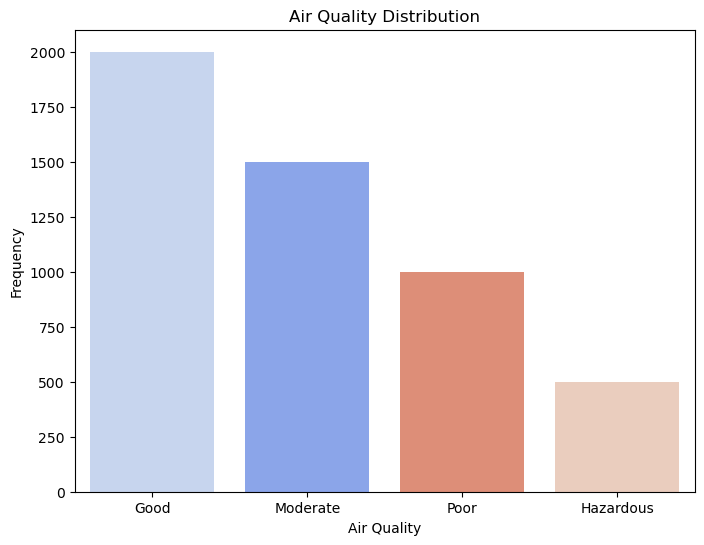

In [335]:
plot_bar_distribution(data, 'Air Quality')

In [336]:
def create_box_plot(data, columns):
    """
    Create a box plot for selected numerical columns.
    """
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=data[columns], palette='coolwarm')
    plt.title('Boxplot of Selected Numerical Variables')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

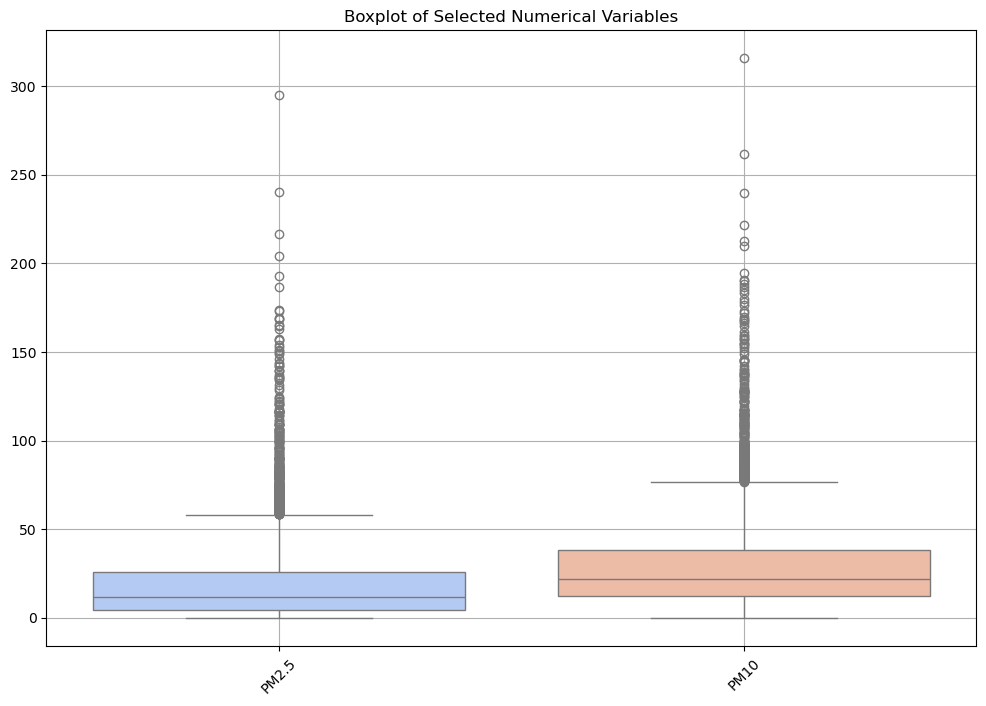

In [337]:
selected_columns = ['PM2.5', 'PM10']
create_box_plot(data, selected_columns)

In [338]:
# Line Plot: PM2.5 vs Temperature
def plot_linear_regression():
    """
    This function plots a linear regression model that predicts PM2.5 levels based on temperature data.
    It also scales the input data, fits a linear regression model, and visualizes the results.
    """
    X = data[['Temperature']].values
    y = data['PM2.5'].values

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    model = LinearRegression()
    model.fit(X_scaled, y)
    y_pred = model.predict(X_scaled)

    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, alpha=0.7, label='Actual Data')
    plt.plot(X, y_pred, color='red', linewidth=2, label='Linear Fit')
    plt.fill_between(X.flatten(), y_pred - 10, y_pred + 10, color='green', alpha=0.9, label='Confidence Interval')
    plt.title('Linear Regression Fit')
    plt.xlabel('Temperature')
    plt.ylabel('PM2.5')
    plt.legend()
    plt.grid(True)
    plt.show()

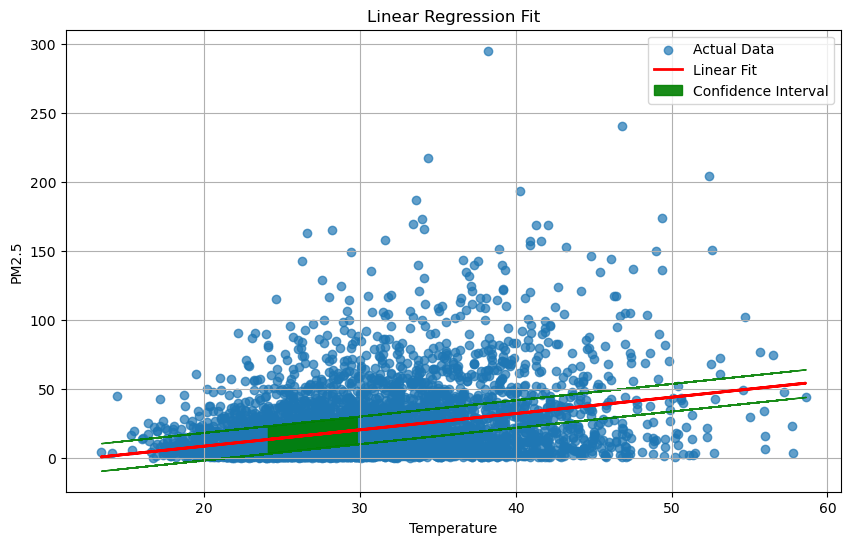

In [339]:
plot_linear_regression()

In [340]:
def plot_elbow_method(data, cluster_range):
    """
    Plot the elbow method to determine the optimal number of clusters.
    """
    inertias = []

    for n in cluster_range:
        _, kmeans, _ = perform_clustering(data.select_dtypes(include=np.number), n)
        inertias.append(kmeans.inertia_)

    plt.figure(figsize=(8, 6))
    plt.plot(cluster_range, inertias, marker='o', linestyle='-')
    plt.title('Elbow Method for Optimal Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid()
    plt.show()

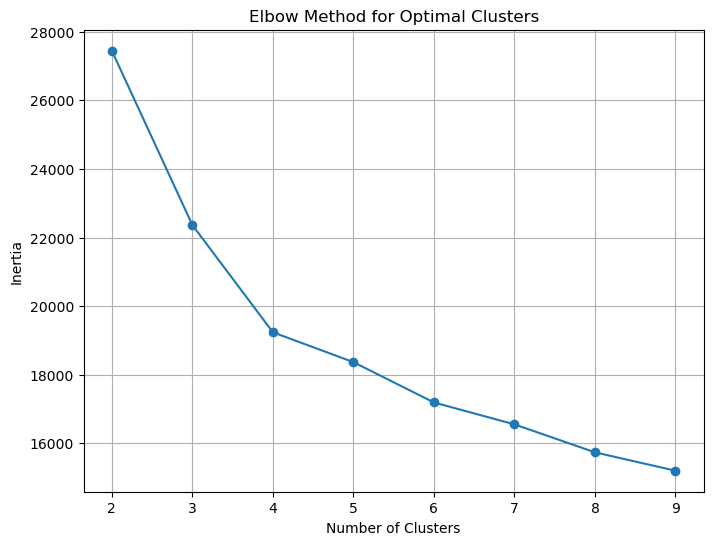

In [341]:
plot_elbow_method(data, range(2, 10))

In [342]:
def plot_temperature_humidity_clusters(data, num_clusters):
    """
    Creates a k-means clustering scatter plot for temperature and humidity.
    """
    # Select relevant columns for clustering
    selected_columns = ['Temperature', 'Humidity']
    clustering_data = data[selected_columns]
    
    # Standardize the data
    scaler = StandardScaler()
    normalized_data = scaler.fit_transform(clustering_data)
    
    # Perform k-means clustering
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    labels = kmeans.fit_predict(normalized_data)
    
    # Add labels to the original dataset
    data['Cluster'] = labels
    
    # Transform centroids back to original scale
    centroids = scaler.inverse_transform(kmeans.cluster_centers_)
    
    # Plotting
    plt.figure(figsize=(10, 8))
    sns.scatterplot(
        x=data['Temperature'],
        y=data['Humidity'],
        hue=labels,
        palette='viridis',
        s=100
    )
    plt.scatter(
        centroids[:, 0],
        centroids[:, 1],
        color='red',
        label='Centroids',
        marker='x',
        s=200
    )
    plt.title('Temperature vs Humidity Clusters with Centroids')
    plt.xlabel('Temperature')
    plt.ylabel('Humidity')
    plt.legend()
    plt.show()

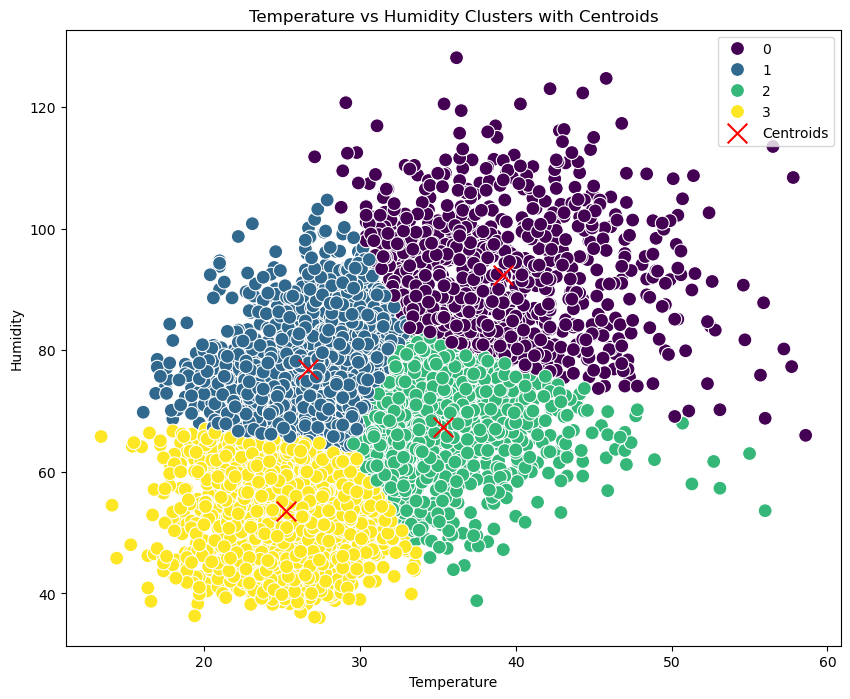

In [343]:
plot_temperature_humidity_clusters(data, num_clusters=4)